In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

### Loading and splitting the MNIST dataset 

In [93]:
mat_data = scipy.io.loadmat('MNIST.mat')
X = mat_data['X']
Y = mat_data['I']
print(X.shape)

(256, 1707)


### Visualization of the shapes of X and Y

In [94]:
print(X.shape, Y.shape)
d,N = X.shape
size = int(np.sqrt(d))

(256, 1707) (1, 1707)


### Extracting an Subset composed only by 8,9 and 6

In [95]:
N1 = 8
N2 = 9
N3 = 6
idx = (Y[0,:] == N1) | (Y[0,:] == N2) | (Y[0,:] == N3)
Y = Y[:, idx]
X = X[:, idx]

### Splitting the subset into Training set and Test set

In [96]:
def train_test_split(X, Y, N_train):
    d,N = X.shape
    idx = np.arange(0, N)
    np.random.shuffle(idx)
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:,train_idx]
    Y_train = Y[:,train_idx]
    X_test = X[:,test_idx]
    Y_test = Y[:,test_idx]
    return X_train,Y_train,X_test,Y_test
    
X_train,Y_train,X_test,Y_test = train_test_split(X, Y, 250)
q_train, w_train = X_train.shape
q_train, w_test = X_test.shape

### Splitting the Training set into classes C1,C2 and C3

In [97]:
idx_1 = (Y_train[0,:] == N1)
C_1 = X_train[:, idx_1]
idx_2 = (Y_train[0,:] == N2)
C_2 = X_train[:, idx_2]
idx_3 = (Y_train[0,:] == N3)
C_3 = X_train[:, idx_3]

### Computing the SVD Decomposition of the three Training sets

In [98]:
U_1, s_1, VT_1 = np.linalg.svd(C_1, full_matrices=False)
U_2, s_2, VT_2 = np.linalg.svd(C_2, full_matrices=False)
U_3, s_3, VT_3 = np.linalg.svd(C_3, full_matrices=False)

### Extracting a random element "y" from the test set and computing the three projections

In [99]:
q, w = X_test.shape
a = np.random.randint(1,w)
y = X_train[:,0:1]
y_1p = U_1 @ (U_1.T @ y)
y_2p = U_2 @ (U_2.T @ y)
y_3p = U_3 @ (U_3.T @ y)

### Misuring the distance of the element "y" from the three projections to determine the number 

In [100]:
d1 = np.linalg.norm(y - y_1p, 2)
d2 = np.linalg.norm(y - y_2p, 2)
d3 = np.linalg.norm(y - y_3p, 2)
print(f" Distance of Y_1 is {d1}")
print(f" Distance of Y_2 is {d2}")
print(f" Distance of Y_3 is {d3}")
if d1 < d2 and d1 < d3:
    print("It's a 1")
elif d2 < d1 and d2 < d3:
    print("It's a 6")
elif d3 < d1 and d3 < d1:
    print("It's a 8")

 Distance of Y_1 is 2.756383670980207
 Distance of Y_2 is 9.349669729778174e-15
 Distance of Y_3 is 3.752442226272876
It's a 6


### Visualizing the element "y"

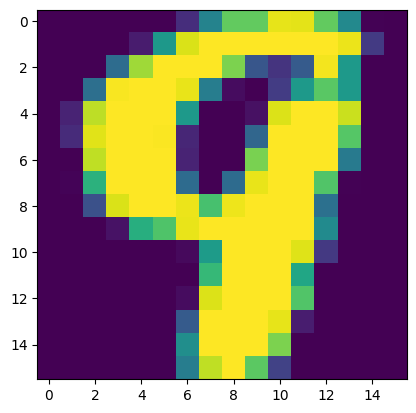

In [101]:
plt.imshow(np.reshape(y[:,0],(size,size)))
plt.show()

### Calculating the misclassification factor using the test Set

In [102]:
print(Y_test[:,9:10].shape)
print(X_test[:,10].shape)

(1, 1)
(256,)


In [103]:
misc_factor = 0
a = 0
for t in range(1,w_train):
    y = X_train[:,t-1:t]
    y_1p = U_1 @ (U_1.T @ y)
    y_2p = U_2 @ (U_2.T @ y)
    y_3p = U_3 @ (U_3.T @ y)
    d1 = np.linalg.norm(y - y_1p, 2)
    d2 = np.linalg.norm(y - y_2p, 2)
    d3 = np.linalg.norm(y - y_3p, 2)
    if d1 < d2 and d1 < d3:
        a = N1
    elif d2 < d1 and d2 < d3:
        a = N2
    elif d3 < d1 and d3 < d1:
        a = N3
    if a!= Y_train[0,t-1]:
        misc_factor +=1
misc_factor /= w_train
print(f"The misclassification factor for train data is: {misc_factor}")

The misclassification factor for train data is: 0.0


In [104]:
misc_factor = 0
a = 0
for t in range(1,w_test):
    y = X_test[:,t-1:t]
    y_1p = U_1 @ (U_1.T @ y)
    y_2p = U_2 @ (U_2.T @ y)
    y_3p = U_3 @ (U_3.T @ y)
    d1 = np.linalg.norm(y - y_1p, 2)
    d2 = np.linalg.norm(y - y_2p, 2)
    d3 = np.linalg.norm(y - y_3p, 2)
    if d1 < d2 and d1 < d3:
        a = N1
    elif d2 < d1 and d2 < d3:
        a = N2
    elif d3 < d1 and d3 < d1:
        a = N3
    if a!= Y_test[0,t-1]:
        misc_factor +=1
misc_factor /= w_test
print(f"The misclassification factor for test data is: {misc_factor}")

The misclassification factor for test data is: 0.022598870056497175
